In [2]:
# import libraries

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers, models, losses, optimizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.naive_bayes import GaussianNB

from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [4]:
vocabulary_size = 5000 # size of the vocabulary
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocabulary_size)  # Splitting dataset into training and testing sets.

In [5]:
# To display the basic statistics about the loaded IMDb dataset.
print('Number of training samples:', len(y_train))
print('Number of positive samples', sum(y_train))
print('Number of test samples:', len(y_test))

Number of training samples: 25000
Number of positive samples 12500
Number of test samples: 25000


In [6]:
# Display the first movie review in the training set.
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [8]:
word_index = imdb.get_word_index() # converting word to index
index_word = {index: word for word, index in word_index.items()} # converting back from index to words

In [9]:
print([index_word.get(i, ' ') for i in X_train[0]]) # displays the first movie review from the training set in a human readable format.

['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'and', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', 'does', 'when', 'from', 'why', 'what', 'have', 'critics', 'they'

In [10]:
review_lengths = [len(x) for x in X_train] # Displays the length of each movie review in the training set.

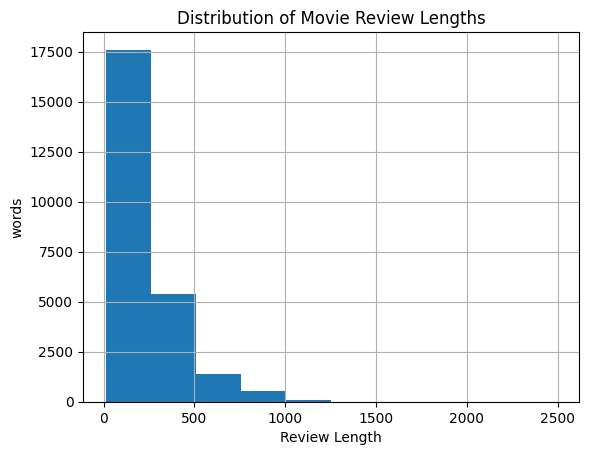

In [12]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(review_lengths, bins=10)

# Add labels and title
plt.xlabel('Review Length')
plt.ylabel('words')
plt.title('Distribution of Movie Review Lengths')

# Add gridlines
plt.grid(True)

# Show plot
plt.show()


In [13]:
# pad the sequence of movie reviews in both training and testing sets.
maxlen = 200 # max lenght is 200 words.
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [15]:
# Display the shape after padding the training and testing sets.
print('X_train shape after padding:', X_train.shape)
print('X_test shape after padding:', X_test.shape)

X_train shape after padding: (25000, 200)
X_test shape after padding: (25000, 200)


In [16]:
# Developing a simple LSTM network
tf.random.set_seed(42) # sets random seeds
model = models.Sequential() # initializes sequential model.

In [17]:
# Adds an embedding layer to the previously initialized sequential model.
embedding_size = 32
model.add(layers.Embedding(vocabulary_size, embedding_size))

In [18]:
# adding an LSTM( Long Short- Term Memory Layer)
model.add(layers.LSTM(50))

In [19]:
# Adding dense layer, with single neuron and sigmoid activation function
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
# prints the summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          160000    
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 176651 (690.04 KB)
Trainable params: 176651 (690.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [21]:
# Model compilation
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [22]:
# model fit
batch_size = 64
n_epoch = 3
model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epoch, validation_data=(X_test, y_test))

Epoch 1/3
391/391 [==============================] - 37s 90ms/step - loss: 0.4184 - accuracy: 0.8054 - val_loss: 0.3236 - val_accuracy: 0.8636
Epoch 2/3
391/391 [==============================] - 35s 89ms/step - loss: 0.2667 - accuracy: 0.8928 - val_loss: 0.3038 - val_accuracy: 0.8718
Epoch 3/3
391/391 [==============================] - 35s 89ms/step - loss: 0.2278 - accuracy: 0.9110 - val_loss: 0.3103 - val_accuracy: 0.8677


In [23]:
# prints the test set accuracy
accuracy = model.evaluate(X_test, y_test, verbose = 0)[1]
print('Test accuracy:', accuracy)

Test accuracy: 0.8677200078964233


In [25]:
# Boosting the performance with multiple LSTM layers
model = models.Sequential()
model.add(layers.Embedding(vocabulary_size, embedding_size))
model.add(layers.LSTM(50, return_sequences=True, dropout=0.2))
model.add(layers.LSTM(50, dropout=0.2))
model.add(layers.Dense(1, activation='sigmoid'))

In [26]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          160000    
                                                                 
 lstm_3 (LSTM)               (None, None, 50)          16600     
                                                                 
 lstm_4 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 196851 (768.95 KB)
Trainable params: 196851 (768.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [28]:
optimizer = optimizers.Adam(learning_rate=0.003)
model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])

In [29]:
n_epoch = 7
model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epoch, validation_data=(X_test, y_test))

Epoch 1/7
391/391 [==============================] - 74s 182ms/step - loss: 0.4738 - accuracy: 0.7761 - val_loss: 0.3662 - val_accuracy: 0.8473
Epoch 2/7
391/391 [==============================] - 70s 180ms/step - loss: 0.3148 - accuracy: 0.8702 - val_loss: 0.3433 - val_accuracy: 0.8522
Epoch 3/7
391/391 [==============================] - 71s 181ms/step - loss: 0.2717 - accuracy: 0.8908 - val_loss: 0.3799 - val_accuracy: 0.8558
Epoch 4/7
391/391 [==============================] - 70s 180ms/step - loss: 0.2632 - accuracy: 0.8932 - val_loss: 0.3347 - val_accuracy: 0.8564
Epoch 5/7
391/391 [==============================] - 70s 180ms/step - loss: 0.2223 - accuracy: 0.9131 - val_loss: 0.3160 - val_accuracy: 0.8705
Epoch 6/7
391/391 [==============================] - 71s 181ms/step - loss: 0.1985 - accuracy: 0.9227 - val_loss: 0.3182 - val_accuracy: 0.8763
Epoch 7/7
391/391 [==============================] - 71s 180ms/step - loss: 0.1985 - accuracy: 0.9218 - val_loss: 0.4362 - val_accuracy:

In [31]:
# Accuracy with stacked LSTM
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print('Test accuracy with stacked LSTM:', accuracy)

Test accuracy with stacked LSTM: 0.8076800107955933


In [32]:
# Plotting the learning curves to visualize the model learning

In [35]:
# Define a function for plotting the curves
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    # Creates subplot axes if not provided
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    # Sets the first subplot for the learning curve
    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    # Compute the learning curve
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )

    # computes the statistics for plotting
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot model scalability (n_samples vs fit_times)
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot model performance (fit_time vs score)
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    # returns the plot object
    return plt

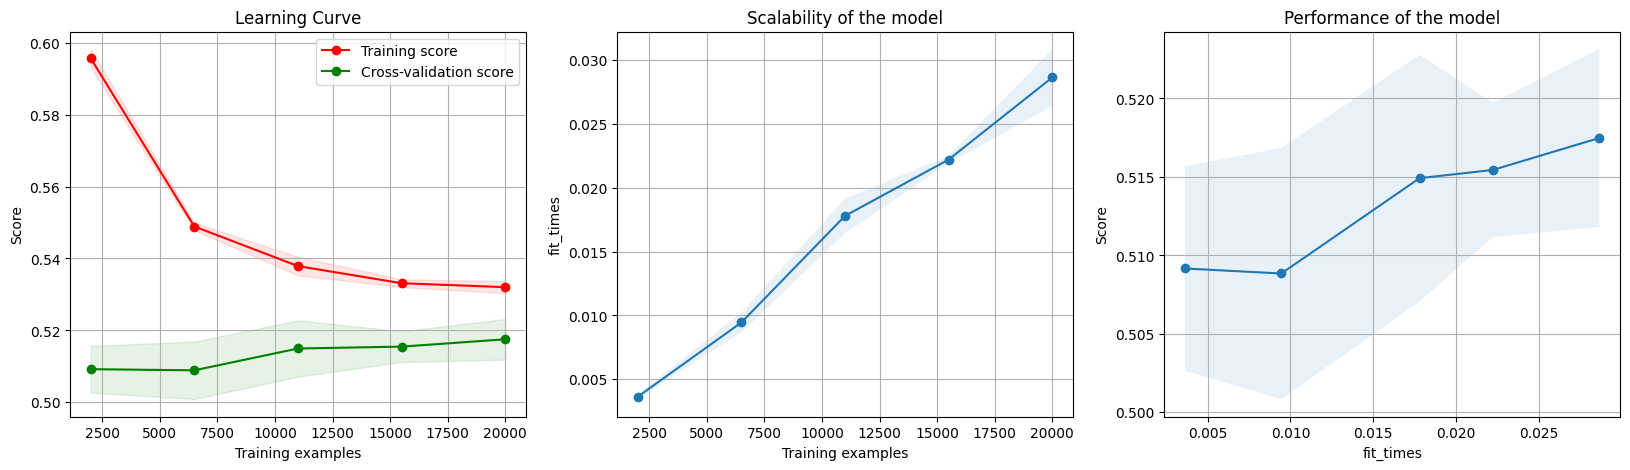

In [36]:
estimator = GaussianNB()
title = "Learning Curve"
plot_learning_curve(estimator, title, X_train, y_train)
plt.show()

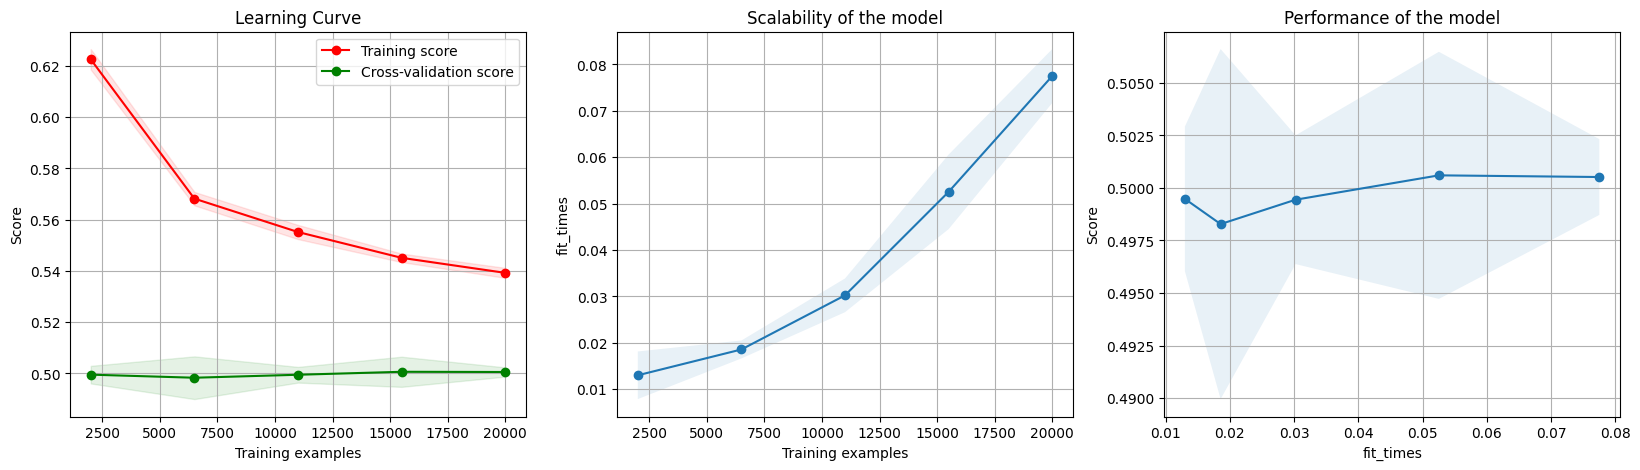

In [37]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
title = "Learning Curve"
plot_learning_curve(estimator, title, X_train, y_train)
plt.show()